
Results for Dataset 1:
                              Model  Test RMSE  Test R^2  Test R^2 (Scaled)  \
0                Linear Regression   1.812502 -0.314053                0.0   
1                 Ridge Regression   1.429732  0.182355                0.0   
2                 Lasso Regression   1.584753 -0.004567                0.0   
3            ElasticNet Regression   1.454041  0.154314                0.0   
4  Support Vector Regression (SVR)   1.257427  0.367557                0.0   
5         Decision Tree Regression   1.673912 -0.120782                0.0   
6         Random Forest Regression   1.277882  0.346813                0.0   
7     Gradient Boosting Regression   1.278401  0.346283                0.0   
8              AdaBoost Regression   1.314109  0.309253                0.0   
9               XGBoost Regression   1.388080  0.229301                0.0   

   CV RMSE Mean  CV RMSE Std  CV R^2 Mean (Scaled)  CV R^2 Std (Scaled)  
0      2.576423     0.624429              

C:\Users\sanay\AppData\Local\Temp\ipykernel_5604\1949778822.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="Test RMSE", palette="viridis")


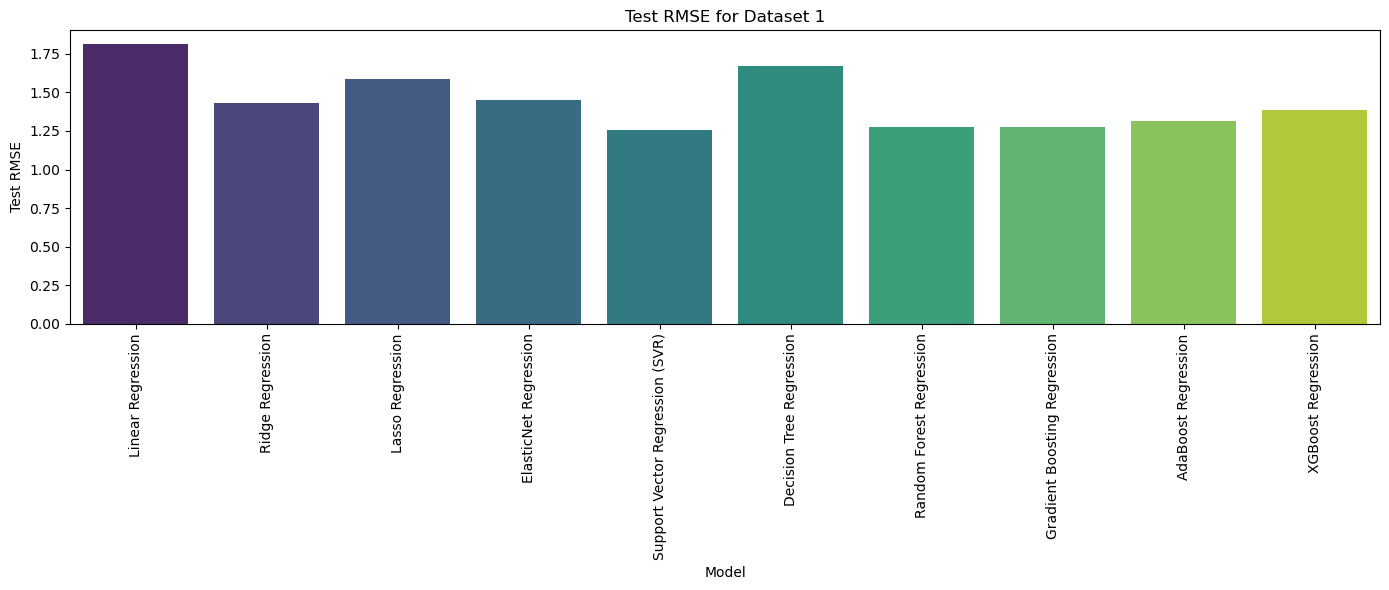

C:\Users\sanay\AppData\Local\Temp\ipykernel_5604\1949778822.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="Test R^2 (Scaled)", palette="viridis")


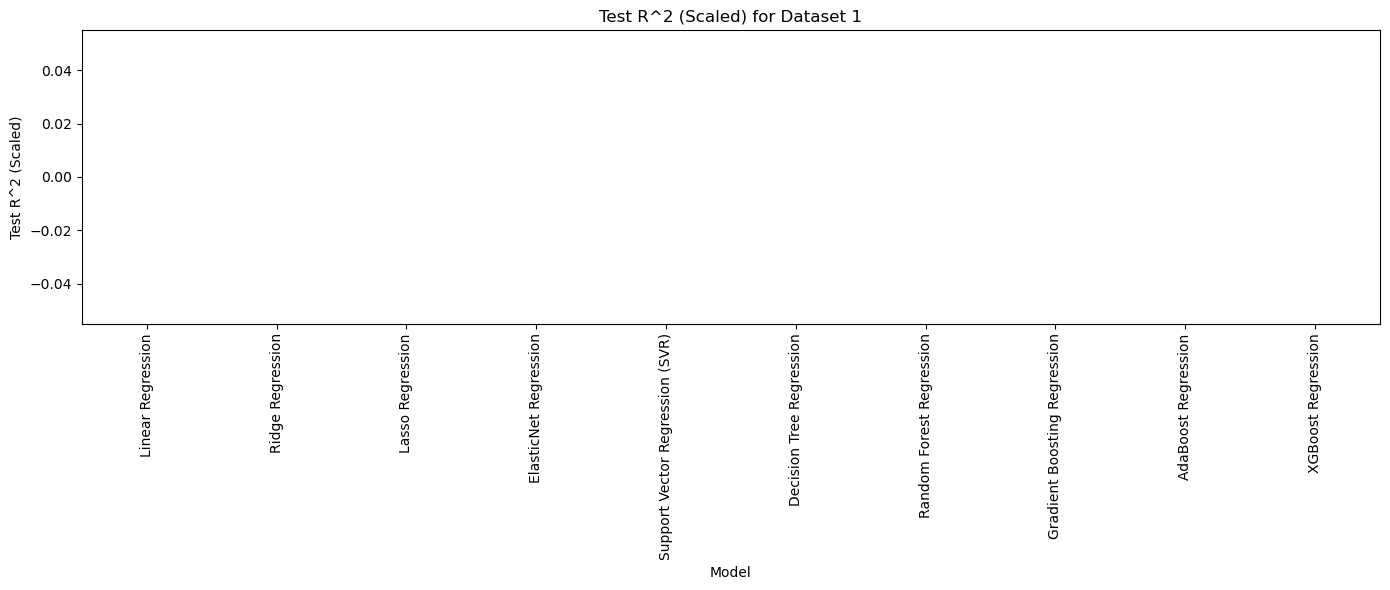


Results for Dataset 2:
                              Model  Test RMSE  Test R^2  Test R^2 (Scaled)  \
0                Linear Regression   1.189996  0.433569                0.0   
1                 Ridge Regression   1.156437  0.465067                0.0   
2                 Lasso Regression   1.584753 -0.004567                0.0   
3            ElasticNet Regression   1.525111  0.069624                0.0   
4  Support Vector Regression (SVR)   1.088341  0.526210                0.0   
5         Decision Tree Regression   1.521123  0.074482                0.0   
6         Random Forest Regression   1.075718  0.537137                0.0   
7     Gradient Boosting Regression   1.129274  0.489901                0.0   
8              AdaBoost Regression   1.283624  0.340930                0.0   
9               XGBoost Regression   1.131870  0.487553                0.0   

   CV RMSE Mean  CV RMSE Std  CV R^2 Mean (Scaled)  CV R^2 Std (Scaled)  
0      1.272282     0.115453              

C:\Users\sanay\AppData\Local\Temp\ipykernel_5604\1949778822.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="Test RMSE", palette="viridis")


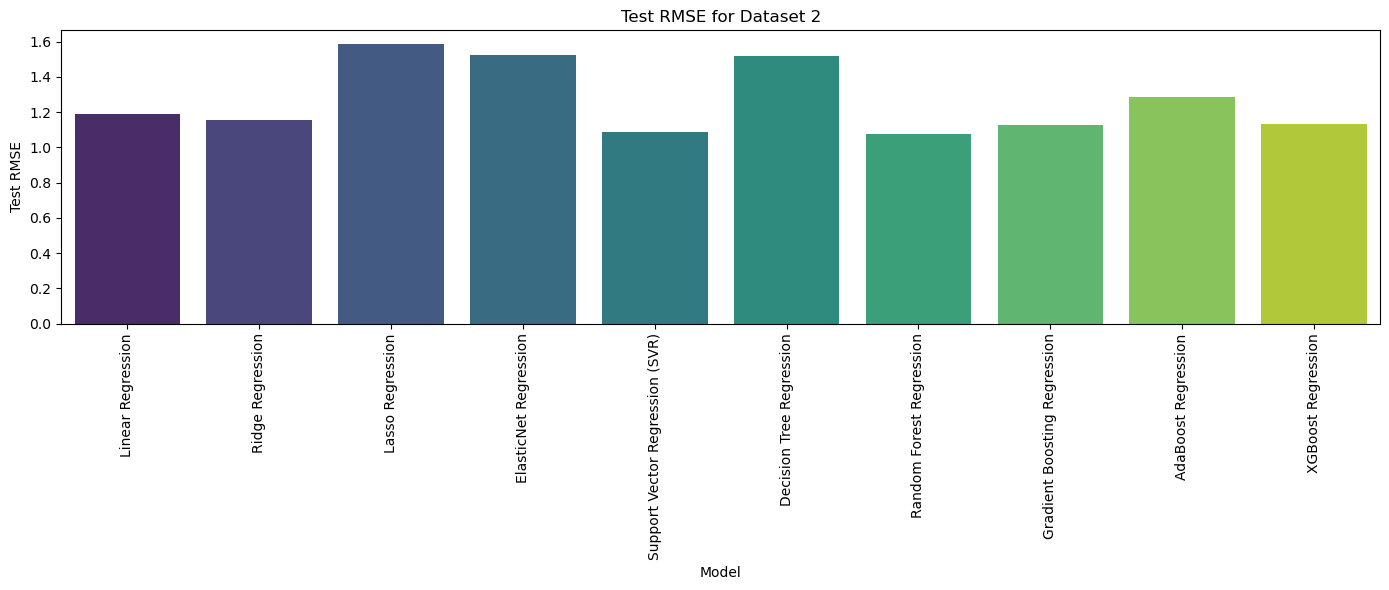

C:\Users\sanay\AppData\Local\Temp\ipykernel_5604\1949778822.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="Test R^2 (Scaled)", palette="viridis")


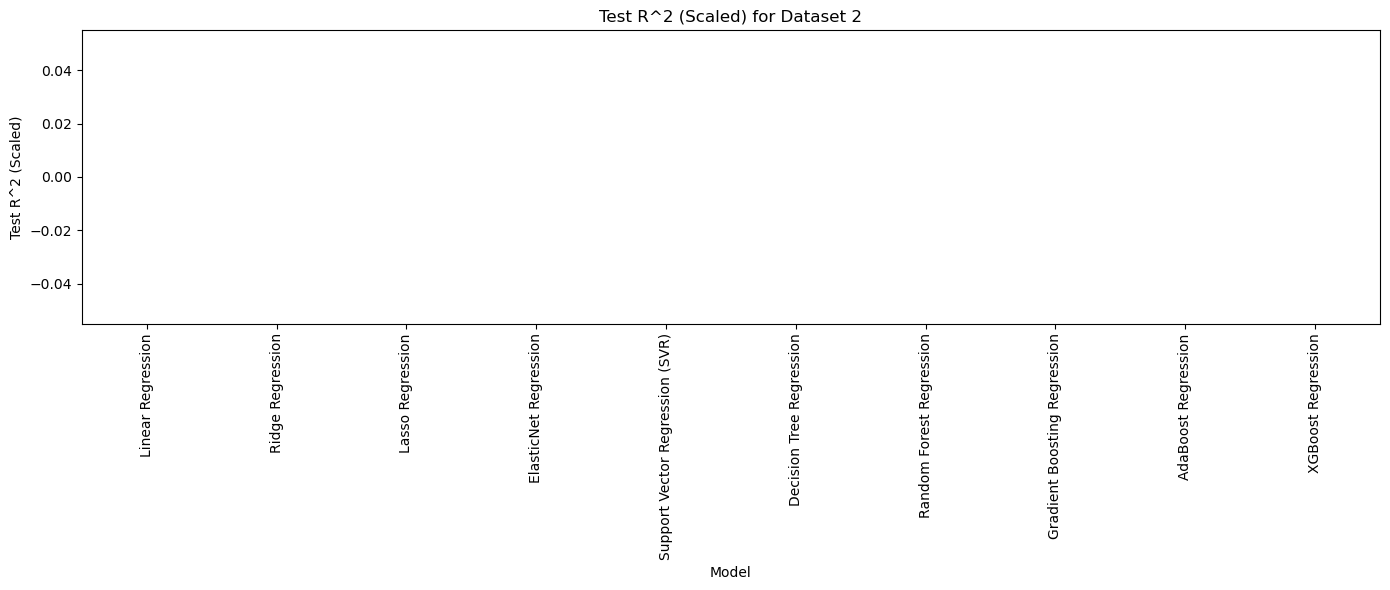

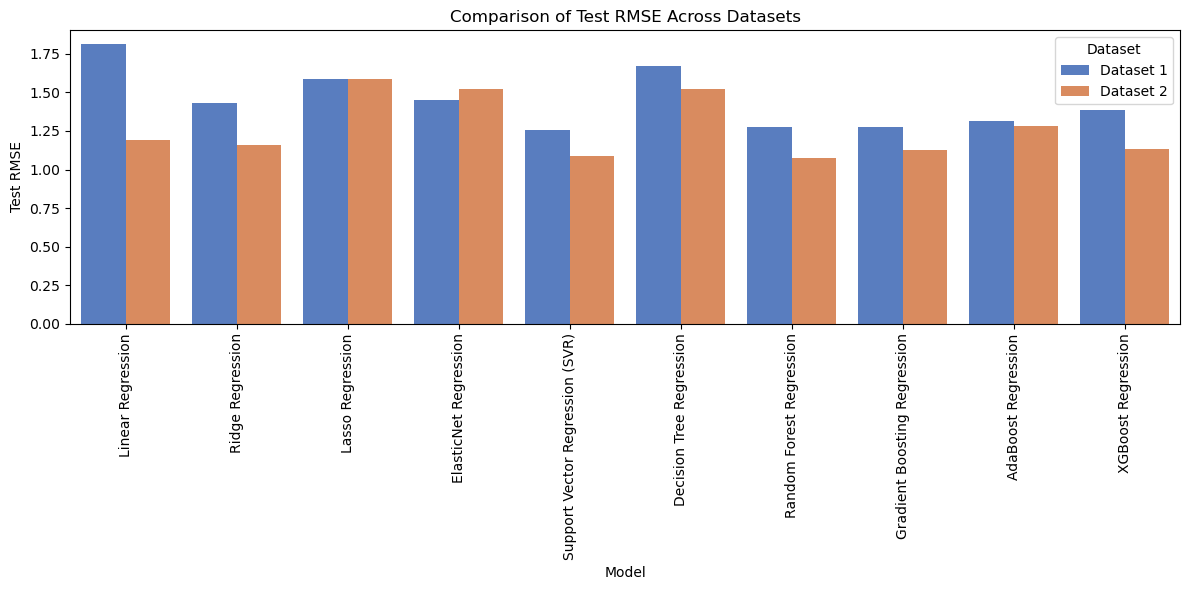

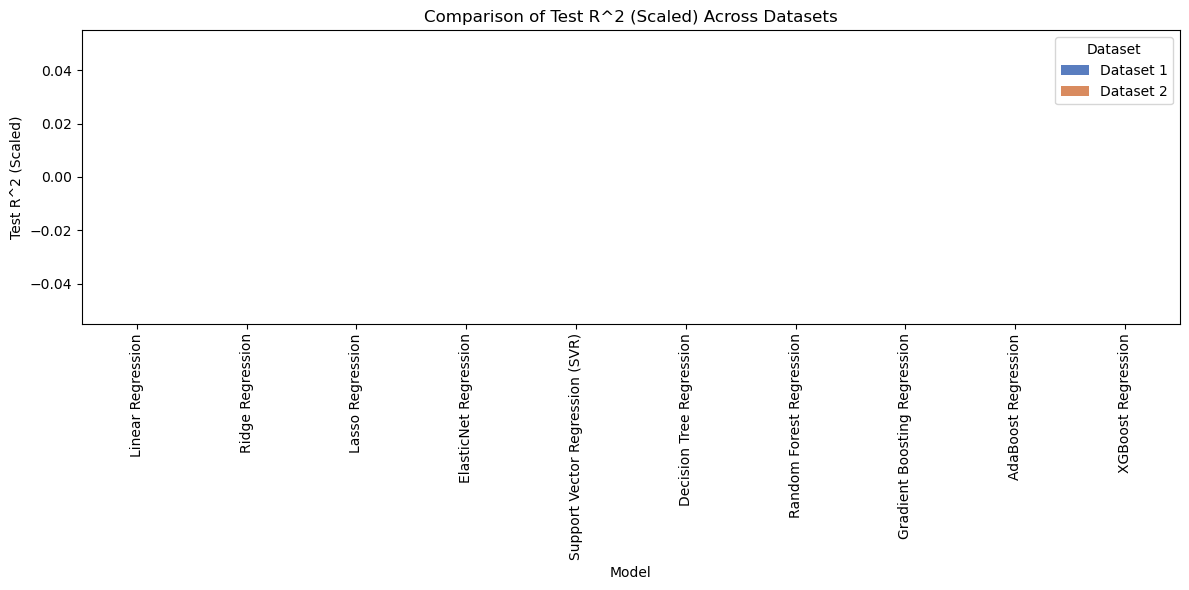

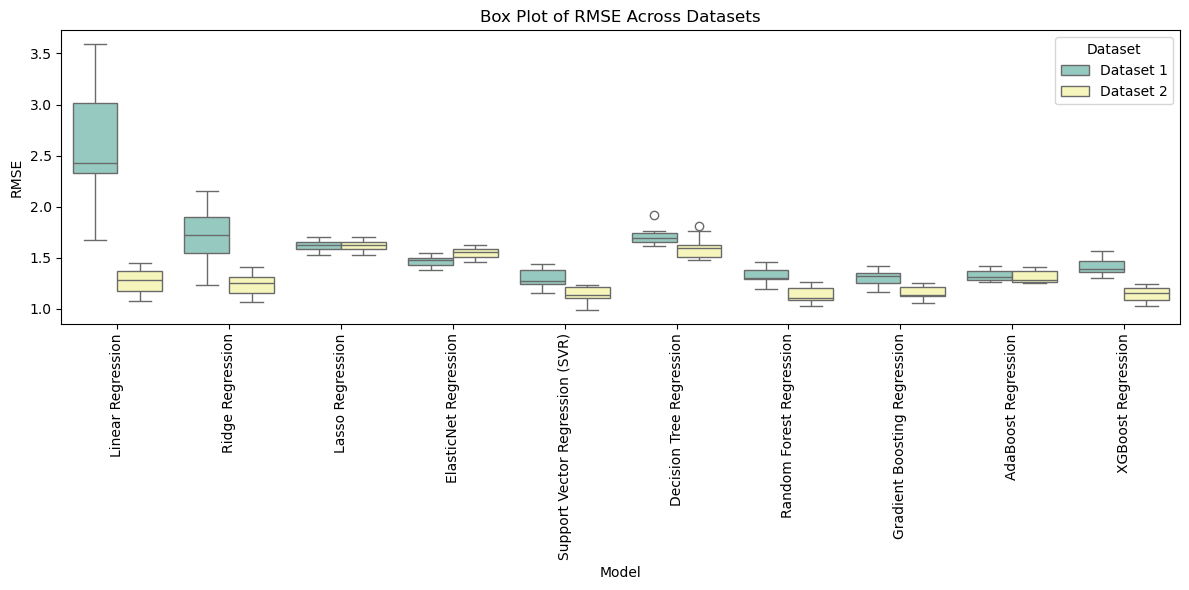

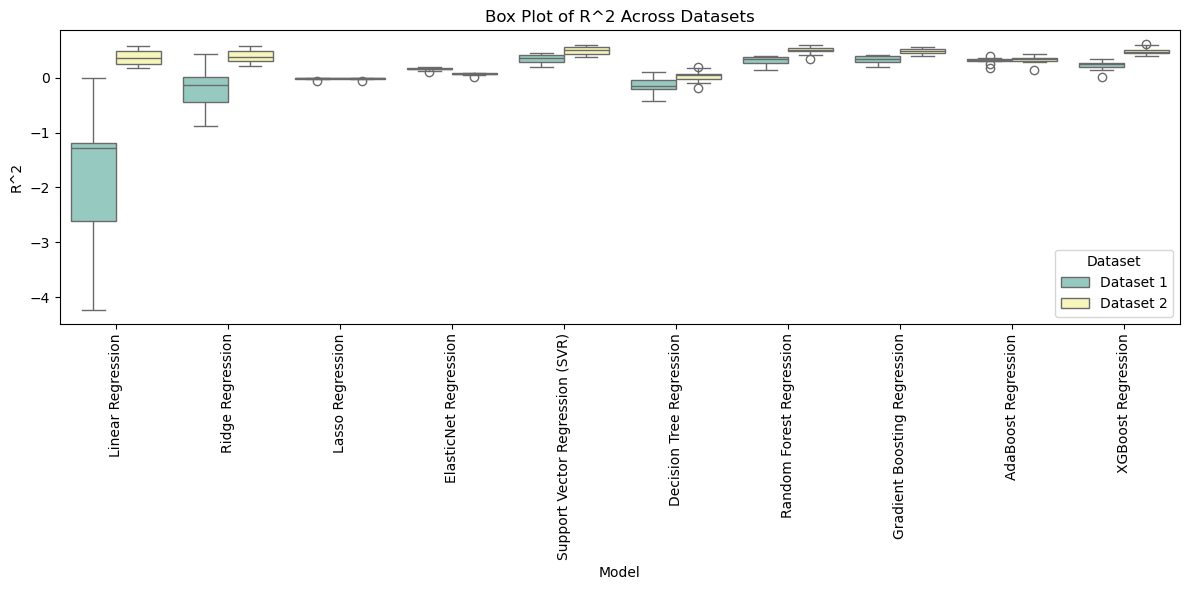

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Define the regression models
def get_regression_models():
    return {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "Lasso Regression": Lasso(),
        "ElasticNet Regression": ElasticNet(),
        "Support Vector Regression (SVR)": SVR(),
        "Decision Tree Regression": DecisionTreeRegressor(),
        "Random Forest Regression": RandomForestRegressor(),
        "Gradient Boosting Regression": GradientBoostingRegressor(),
        "AdaBoost Regression": AdaBoostRegressor(),
        "XGBoost Regression": XGBRegressor()
    }

# Scale R^2 values to 0-1
def scale_r2(r2_scores):
    scaler = MinMaxScaler(feature_range=(0, 1))
    r2_scaled = scaler.fit_transform(np.array(r2_scores).reshape(-1, 1))
    return r2_scaled.flatten()

# Preprocess data (custom preprocessing function if needed)
def preprocess_data(dataset):
    # Example preprocessing: drop missing values or fill them
    dataset.fillna(dataset.mean(), inplace=True)
    return dataset

# Train and evaluate models
def evaluate_models(X_train, X_test, y_train, y_test, models, dataset_name):
    results = []
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    fold_results = {"Model": [], "Dataset": [], "RMSE": [], "R^2": []}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        # 10-fold cross-validation
        cv_rmse = -cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
        cv_r2 = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
        
        # Scale R^2 values
        cv_r2_scaled = scale_r2(cv_r2)
        r2_scaled = scale_r2([r2])[0]
        
        # Store results
        results.append({
            "Model": name,
            "Test RMSE": rmse,
            "Test R^2": r2,
            "Test R^2 (Scaled)": r2_scaled,
            "CV RMSE Mean": cv_rmse.mean(),
            "CV RMSE Std": cv_rmse.std(),
            "CV R^2 Mean (Scaled)": cv_r2_scaled.mean(),
            "CV R^2 Std (Scaled)": cv_r2_scaled.std()
        })

        # Add fold results for box plots
        for fold_rmse, fold_r2 in zip(cv_rmse, cv_r2):
            fold_results["Model"].append(name)
            fold_results["Dataset"].append(dataset_name)
            fold_results["RMSE"].append(fold_rmse)
            fold_results["R^2"].append(fold_r2)

    results_df = pd.DataFrame(results)
    fold_results_df = pd.DataFrame(fold_results)
    print(f"\nResults for {dataset_name}:\n", results_df)
    return results_df, fold_results_df

# Plot metrics
def plot_metrics(results_df, dataset_name):
    plt.figure(figsize=(14, 6))
    sns.barplot(data=results_df, x="Model", y="Test RMSE", palette="viridis")
    plt.xticks(rotation=90)
    plt.title(f"Test RMSE for {dataset_name}")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 6))
    sns.barplot(data=results_df, x="Model", y="Test R^2 (Scaled)", palette="viridis")
    plt.xticks(rotation=90)
    plt.title(f"Test R^2 (Scaled) for {dataset_name}")
    plt.tight_layout()
    plt.show()

def plot_comparisons(all_results):
    combined_results = pd.concat(all_results, keys=["Dataset 1", "Dataset 2"], names=["Dataset"])
    metrics = ["Test RMSE", "Test R^2 (Scaled)"]

    for metric in metrics:
        plt.figure(figsize=(12, 6))
        sns.barplot(data=combined_results, x="Model", y=metric, hue="Dataset", palette="muted")
        plt.xticks(rotation=90)
        plt.title(f"Comparison of {metric} Across Datasets")
        plt.tight_layout()
        plt.show()

def plot_boxplots(fold_results):
    for metric in ["RMSE", "R^2"]:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=fold_results, x="Model", y=metric, hue="Dataset", palette="Set3")
        plt.xticks(rotation=90)
        plt.title(f"Box Plot of {metric} Across Datasets")
        plt.tight_layout()
        plt.show()

# Main workflow
def main():
    # Load the datasets
    dataset1 = pd.read_csv(r"C:\Users\sanay\Desktop\MACHINE LEARNING\EMBEDDINGS_GPT2.csv")
    dataset2 = pd.read_csv(r"C:\Users\sanay\Desktop\MACHINE LEARNING\FASTEXT.csv")
    
    # Preprocess datasets
    dataset1 = preprocess_data(dataset1)
    dataset2 = preprocess_data(dataset2)
    
    # Specify columns and target for each dataset
    datasets = {
        "Dataset 1": {"data": dataset1, "features": dataset1.columns[:-1], "target": "Marks"},
        "Dataset 2": {"data": dataset2, "features": dataset2.columns[:-1], "target": "Marks"}
    }
    
    models = get_regression_models()
    all_results = []
    all_fold_results = []

    # Loop through both datasets
    for dataset_name, details in datasets.items():
        dataset = details["data"]
        X = dataset[details["features"]]
        y = dataset[details["target"]]

        scaler = StandardScaler()
        X = scaler.fit_transform(X)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        results_df, fold_results_df = evaluate_models(X_train, X_test, y_train, y_test, models, dataset_name)

        all_results.append(results_df)
        all_fold_results.append(fold_results_df)

        plot_metrics(results_df, dataset_name)

    # Plot the comparison of models across datasets
    plot_comparisons(all_results)
    
    # Combine fold results and plot boxplots
    combined_fold_results = pd.concat(all_fold_results)
    plot_boxplots(combined_fold_results)

if __name__ == "__main__":
    main()

